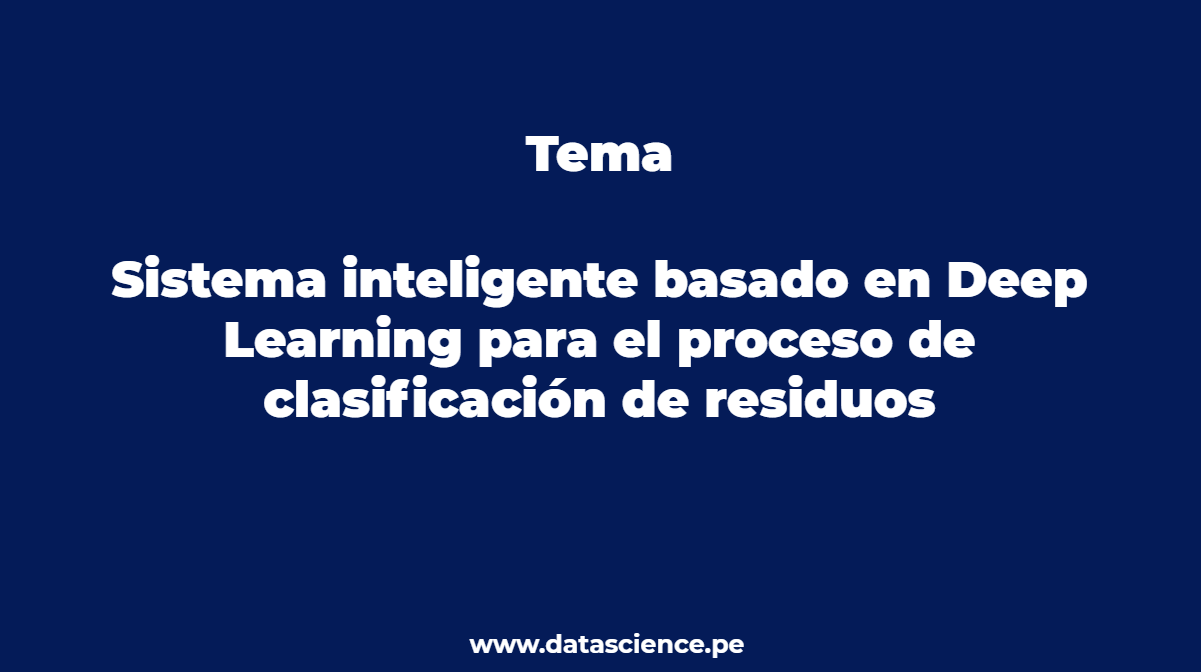

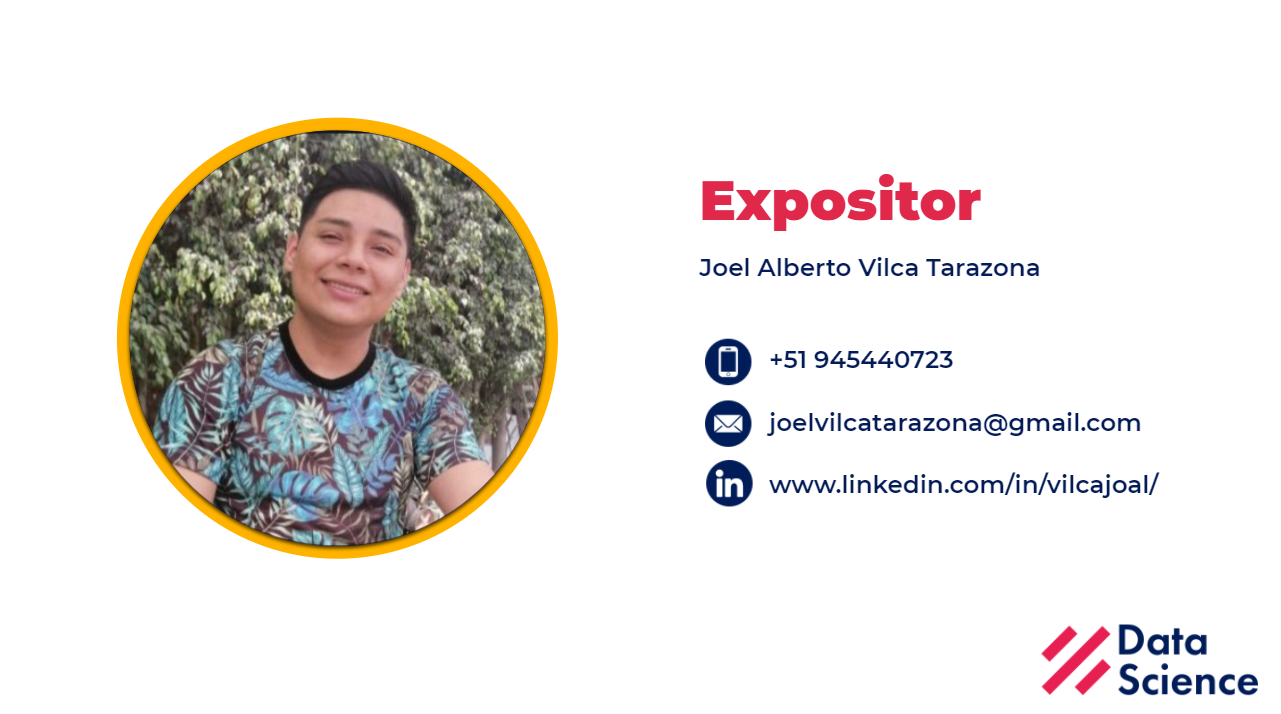

# TREE

# _1.IMPORTAR LIBRERÍAS_

###### -------[LIBRERÍAS DE 2. ](#2)-------

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from random import randrange
import glob

###### -------[LIBRERÍAS DE 3. ](#3)-------

In [53]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
print('Tensorflow: ',tf.__version__)
from tensorflow import keras
print('TF Keras: ',keras.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Tensorflow:  2.5.0
TF Keras:  2.5.0


###### -------[LIBRERÍAS DE 4. ](#4)-------

In [54]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD, Adam

import keras.utils.vis_utils
from importlib import reload
reload(keras.utils.vis_utils)
from keras.utils.vis_utils import pydot
from keras.utils.vis_utils import plot_model

###### -------[LIBRERÍAS DE 5. ](#5)-------

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

###### -------[LIBRERÍAS DE 6. ](#6)-------

###### -------[LIBRERÍAS DE 7. ](#7)-------

In [84]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# _2.CARGA DE DATOS_ <a id='2'></a>

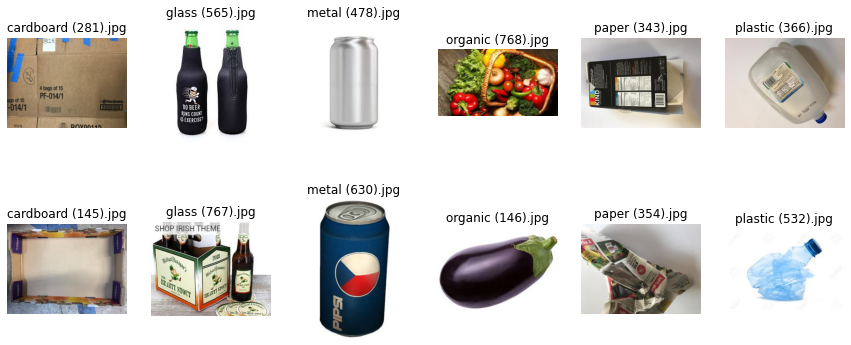

In [56]:
# Project main folder
project_folder = "Dataset"

#train
files_train_cardboard = glob.glob(project_folder+"/train/cardboard/*.jpg")
files_train_glass = glob.glob(project_folder+"/train/glass/*.jpg")
files_train_metal = glob.glob(project_folder+"/train/metal/*.jpg")
files_train_organic = glob.glob(project_folder+"/train/organic/*.jpg")
files_train_paper = glob.glob(project_folder+"/train/paper/*.jpg")
files_train_plastic = glob.glob(project_folder+"/train/plastic/*.jpg")

#test
files_test_cardboard = glob.glob(project_folder+"/test/cardboard/*.jpg")
files_test_glass = glob.glob(project_folder+"/test/glass/*.jpg")
files_test_metal = glob.glob(project_folder+"/test/metal/*.jpg")
files_test_organic = glob.glob(project_folder+"/test/organic/*.jpg")
files_test_paper = glob.glob(project_folder+"/test/paper/*.jpg")
files_test_plastic = glob.glob(project_folder+"/test/plastic/*.jpg")


#train random
file_train_cardboard = files_train_cardboard[randrange(len(files_train_cardboard))]
image_train_cardboard = tf.keras.preprocessing.image.load_img(file_train_cardboard)
file_train_glass = files_train_glass[randrange(len(files_train_glass))]
image_train_glass = tf.keras.preprocessing.image.load_img(file_train_glass)
file_train_metal = files_train_metal[randrange(len(files_train_metal))]
image_train_metal = tf.keras.preprocessing.image.load_img(file_train_metal)
file_train_organic = files_train_organic[randrange(len(files_train_organic))]
image_train_organic = tf.keras.preprocessing.image.load_img(file_train_organic)
file_train_paper = files_train_paper[randrange(len(files_train_paper))]
image_train_paper = tf.keras.preprocessing.image.load_img(file_train_paper)
file_train_plastic = files_train_plastic[randrange(len(files_train_plastic))]
image_train_plastic = tf.keras.preprocessing.image.load_img(file_train_plastic)

#test random
file_test_cardboard = files_test_cardboard[randrange(len(files_test_cardboard))]
image_test_cardboard = tf.keras.preprocessing.image.load_img(file_test_cardboard)
file_test_glass = files_test_glass[randrange(len(files_test_glass))]
image_test_glass = tf.keras.preprocessing.image.load_img(file_test_glass)
file_test_metal = files_test_metal[randrange(len(files_test_metal))]
image_test_metal = tf.keras.preprocessing.image.load_img(file_test_metal)
file_test_organic = files_test_organic[randrange(len(files_test_organic))]
image_test_organic = tf.keras.preprocessing.image.load_img(file_test_organic)
file_test_paper = files_test_paper[randrange(len(files_test_paper))]
image_test_paper = tf.keras.preprocessing.image.load_img(file_test_paper)
file_test_plastic = files_test_plastic[randrange(len(files_test_plastic))]
image_test_plastic = tf.keras.preprocessing.image.load_img(file_test_plastic)

imgs = [image_train_cardboard,image_train_glass,image_train_metal
            ,image_train_organic,image_train_paper,image_train_plastic
            ,image_test_cardboard,image_test_glass,image_test_metal
            ,image_test_organic,image_test_paper,image_test_plastic]

rutas = [file_train_cardboard,file_train_glass,file_train_metal,file_train_organic
           ,file_train_paper,file_train_plastic,file_test_cardboard,file_test_glass
           ,file_test_metal,file_test_organic,file_test_paper,file_test_plastic]

# Visualizando 12 figuras aleatorias
fig = plt.gcf()
fig.set_size_inches(15, 15)

for i in range(12):
    plt.subplot(2,6,i+1)
    plt.imshow(imgs[i])
    plt.title(rutas[i].split("\\")[-1])
    plt.axis("off")

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.4, 
                    wspace=0.2, 
                    hspace=0.35)

plt.show()

# _3.PREPROCESAMIENTO DE IMAGENES_ <a id='3'></a>

In [57]:
# imagenes reesaladas a 250x250
img_width = 224
img_height = 224
batch_size = 100

In [58]:
# ENTRENAMINETO

# aumento y normalizacion de datos 
datagen_train = ImageDataGenerator(rescale=1.0/255.0,      # Normalizing images in range [0-1]
                                   horizontal_flip=True,   # Horizontal flip
                                   rotation_range=15,      # Random rotation (clockwise) between 0 and 15 degres
                                   width_shift_range=0.15,  # Move image horizontally 15%
                                   height_shift_range=0.15, # Move image vertically 15%
                                   zoom_range=0.2)          # Zoom in / Zoom out randomly 20% => [80% - 120%]

# leer imagenes de carpeta conjunto train
training_set_imgs = datagen_train.flow_from_directory(project_folder + '/train',
                                                 target_size = (img_width, img_height),
                                                 class_mode = 'categorical',
                                                 batch_size = batch_size)

num_imgs_training = len(training_set_imgs.filenames)


print("Num. imganes de entrenamiento:", num_imgs_training)
print("Classes:", training_set_imgs.class_indices)  
print("Num. imgs Class [0]:", np.sum(training_set_imgs.labels == 0, axis=0))
print("Num. imgs Class [1]:", np.sum(training_set_imgs.labels == 1, axis=0))
print("Num. imgs Class [2]:", np.sum(training_set_imgs.labels == 2, axis=0))
print("Num. imgs Class [3]:", np.sum(training_set_imgs.labels == 3, axis=0))
print("Num. imgs Class [4]:", np.sum(training_set_imgs.labels == 4, axis=0))
print("Num. imgs Class [5]:", np.sum(training_set_imgs.labels == 5, axis=0))

Found 3600 images belonging to 6 classes.
Num. imganes de entrenamiento: 3600
Classes: {'cardboard': 0, 'glass': 1, 'metal': 2, 'organic': 3, 'paper': 4, 'plastic': 5}
Num. imgs Class [0]: 600
Num. imgs Class [1]: 600
Num. imgs Class [2]: 600
Num. imgs Class [3]: 600
Num. imgs Class [4]: 600
Num. imgs Class [5]: 600


In [59]:
# VALIDACION

# aumento y normalizacion de datos
datagen_valid = ImageDataGenerator(rescale=1.0/255.0)    

# leer imagenes de carpeta conjunto validacion
valid_set_imgs = datagen_train.flow_from_directory(project_folder + '/valid',
                                                 target_size = (img_width, img_height),
                                                 class_mode = 'categorical',
                                                 batch_size = batch_size)

num_imgs_valid = len(valid_set_imgs.filenames)

print("Num. imganes de validacion:", num_imgs_valid)
print("Classes:", valid_set_imgs.class_indices)  
print("Num. imgs Class [0]:", np.sum(valid_set_imgs.labels == 0, axis=0))
print("Num. imgs Class [1]:", np.sum(valid_set_imgs.labels == 1, axis=0))
print("Num. imgs Class [2]:", np.sum(valid_set_imgs.labels == 2, axis=0))
print("Num. imgs Class [3]:", np.sum(valid_set_imgs.labels == 3, axis=0))
print("Num. imgs Class [4]:", np.sum(valid_set_imgs.labels == 4, axis=0))
print("Num. imgs Class [5]:", np.sum(valid_set_imgs.labels == 5, axis=0))

Found 1200 images belonging to 6 classes.
Num. imganes de validacion: 1200
Classes: {'cardboard': 0, 'glass': 1, 'metal': 2, 'organic': 3, 'paper': 4, 'plastic': 5}
Num. imgs Class [0]: 200
Num. imgs Class [1]: 200
Num. imgs Class [2]: 200
Num. imgs Class [3]: 200
Num. imgs Class [4]: 200
Num. imgs Class [5]: 200


In [60]:
# TEST

datagen_test = ImageDataGenerator() 

test_set_imgs = datagen_train.flow_from_directory(project_folder + '/test',
                                                 target_size = (img_width, img_height),
                                                 class_mode = 'categorical',
                                                 batch_size = batch_size, shuffle=False)

num_imgs_test = len(test_set_imgs.filenames)

print("Num. imganes de test:", num_imgs_test)
print("Classes:", test_set_imgs.class_indices)  
print("Num. imgs Class [0]:", np.sum(test_set_imgs.labels == 0, axis=0))
print("Num. imgs Class [1]:", np.sum(test_set_imgs.labels == 1, axis=0))
print("Num. imgs Class [2]:", np.sum(test_set_imgs.labels == 2, axis=0))
print("Num. imgs Class [3]:", np.sum(test_set_imgs.labels == 3, axis=0))
print("Num. imgs Class [4]:", np.sum(test_set_imgs.labels == 4, axis=0))
print("Num. imgs Class [5]:", np.sum(test_set_imgs.labels == 5, axis=0))

Found 1200 images belonging to 6 classes.
Num. imganes de test: 1200
Classes: {'cardboard': 0, 'glass': 1, 'metal': 2, 'organic': 3, 'paper': 4, 'plastic': 5}
Num. imgs Class [0]: 200
Num. imgs Class [1]: 200
Num. imgs Class [2]: 200
Num. imgs Class [3]: 200
Num. imgs Class [4]: 200
Num. imgs Class [5]: 200


# _4.MODELADO_ <a id='4'></a>

In [61]:
# Model: "inception_resnet_v2"
incep_conv = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
incep_conv.summary();

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 111, 111, 32) 96          conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 111, 111, 32) 0           batch_normalization_203[0][0]    
________________________________________________________________________________

In [73]:
for layer in incep_conv.layers[:]:
    layer.trainable = False

In [63]:
for layer in incep_conv.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000001B9E95EB148> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001B9E95EB188> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001B9E95D9CC8> False
<tensorflow.python.keras.layers.core.Activation object at 0x000001B996C66F08> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001B9EA665DC8> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001B9E95BA3C8> False
<tensorflow.python.keras.layers.core.Activation object at 0x000001B9E95E7C08> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001B9E95E7A48> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001B9E95D1D88> False
<tensorflow.python.keras.layers.core.Activation object at 0x000001B9F6833688> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001B9E9595

In [64]:
model = Sequential()

model.add(incep_conv)

model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(6, activation='softmax'))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 5, 5, 1536)        54336736  
_________________________________________________________________
flatten_3 (Flatten)          (None, 38400)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 4096)              157290496 
_________________________________________________________________
dropout_4 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 4096)              16781312  
_________________________________________________________________
dropout_5 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 6)                

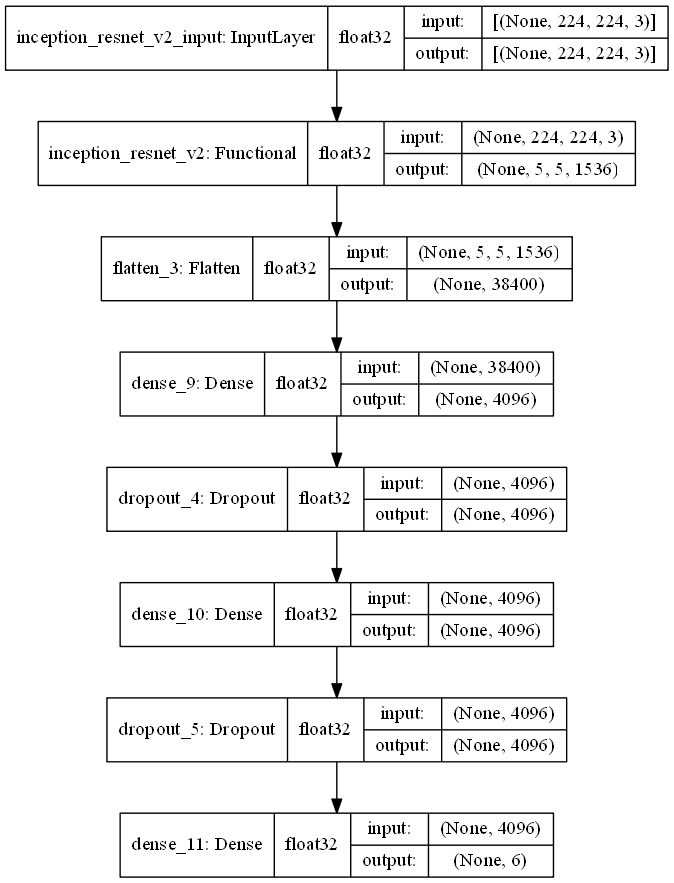

In [99]:
model.summary()
tf.keras.utils.plot_model(
    model, to_file='InceptionResNetV2_model_plt.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=100
)

In [66]:
opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
#opt = SGD(lr=0.0001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
epochs=10
history = model.fit_generator(training_set_imgs, 
                              epochs=epochs,
                              steps_per_epoch=np.ceil(num_imgs_training/batch_size),
                              validation_data=valid_set_imgs,
                              validation_steps=np.ceil(num_imgs_valid/batch_size))

Epoch 1/10
36/36 [==============================] - 326s 9s/step - loss: 0.4721 - accuracy: 0.8397 - val_loss: 0.4933 - val_accuracy: 0.8392
Epoch 2/10
36/36 [==============================] - 319s 9s/step - loss: 0.4340 - accuracy: 0.8586 - val_loss: 0.4439 - val_accuracy: 0.8467
Epoch 3/10
36/36 [==============================] - 320s 9s/step - loss: 0.4309 - accuracy: 0.8453 - val_loss: 0.4045 - val_accuracy: 0.8667
Epoch 4/10
36/36 [==============================] - 318s 9s/step - loss: 0.4269 - accuracy: 0.8494 - val_loss: 0.5093 - val_accuracy: 0.8317
Epoch 5/10
36/36 [==============================] - 322s 9s/step - loss: 0.3910 - accuracy: 0.8661 - val_loss: 0.4140 - val_accuracy: 0.8608
Epoch 6/10
36/36 [==============================] - 318s 9s/step - loss: 0.3824 - accuracy: 0.8692 - val_loss: 0.4732 - val_accuracy: 0.8358
Epoch 7/10
36/36 [==============================] - 331s 9s/step - loss: 0.3657 - accuracy: 0.8767 - val_loss: 0.4442 - val_accuracy: 0.8467
Epoch 8/10
36

# _5.EVALUACIÓN DE MODELO_ <a id='5'></a>

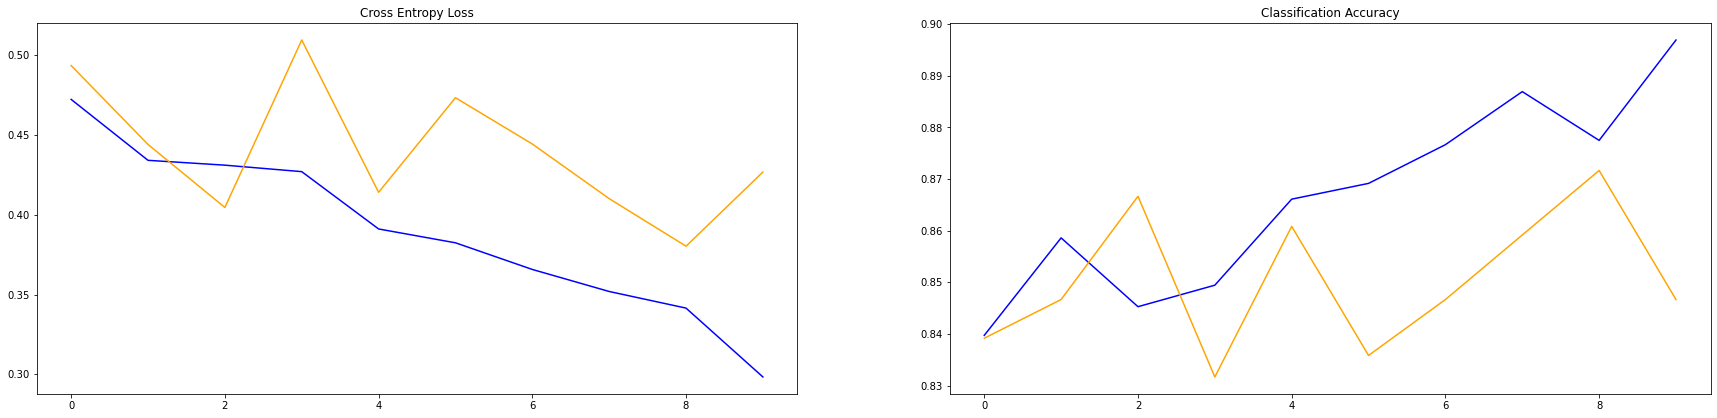

In [69]:
# plot loss
plt.figure(1, figsize=(30,15))
plt.subplot(221)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')

# plot accuracy
plt.subplot(222)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [70]:
# Evaluating model
eval = model.evaluate_generator(test_set_imgs, steps=np.ceil(num_imgs_test/batch_size))
print('\nValidación en Test:')
print("Loss: {:.4}".format(eval[0]))
print("Accuracy: {:.2%}".format(eval[1]))


Validación en Test:
Loss: 0.4264
Accuracy: 86.67%


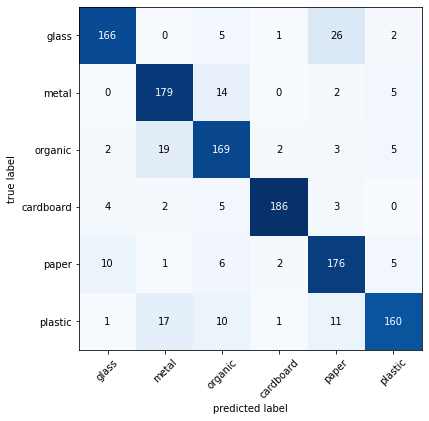

In [71]:
cm_plot_labels = [ 'glass', 'metal', 'organic','cardboard', 'paper', 'plastic']

predictions = model.predict_generator(generator=test_set_imgs)

y_pred = np.argmax(predictions, axis=1)
y_real = test_set_imgs.classes

matc=confusion_matrix(y_real, y_pred)
plot_confusion_matrix(conf_mat=matc, figsize=(6,6), class_names = cm_plot_labels, show_normed=False)
plt.tight_layout()

In [72]:
print(metrics.classification_report(y_real, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.9071    0.8300    0.8668       200
           1     0.8211    0.8950    0.8565       200
           2     0.8086    0.8450    0.8264       200
           3     0.9688    0.9300    0.9490       200
           4     0.7964    0.8800    0.8361       200
           5     0.9040    0.8000    0.8488       200

    accuracy                         0.8633      1200
   macro avg     0.8677    0.8633    0.8639      1200
weighted avg     0.8677    0.8633    0.8639      1200



# _6.GUARDAR MODELO EN DISCO_ <a id='6'></a>

In [81]:
# Keras formato
carperta_proyecto = "F:\Repositorios\DSRP_Semillero_ClasificacionResiduos"
model.save(carperta_proyecto +"\Modelos\model_InceptionResNetV2.h5", save_format='h5')
print("Modelo guardado en disco ...")

Modelo guardado en disco ...


# _7.PREDICCIONES_ <a id='7'></a>

In [83]:
loaded_model = load_model(carperta_proyecto + "\Modelos\model_InceptionResNetV2.h5")
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 5, 5, 1536)        54336736  
_________________________________________________________________
flatten_3 (Flatten)          (None, 38400)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 4096)              157290496 
_________________________________________________________________
dropout_4 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 4096)              16781312  
_________________________________________________________________
dropout_5 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 6)                

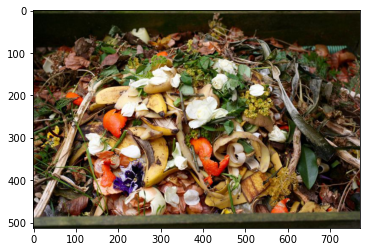

[4.0543400e-05 1.0706470e-05 2.4748055e-04 9.9959165e-01 2.1315152e-05
 8.8319706e-05]
Index: 3
Pedicción: organic
Prob: 0.99959165


In [98]:
folder_ejemplos = carperta_proyecto+"/imgs"
img_ruta = folder_ejemplos + '/ejemplo_organico.jpg'
test_image = image.load_img(img_ruta)
plt.imshow(test_image)
plt.show()

test_image = image.load_img(img_ruta,target_size = (img_width, img_height))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image = test_image.astype('float32') 
test_image /= 255.0 

predictions = loaded_model.predict(test_image)[0]
print(predictions)
index = np.argmax(predictions)

CLASSES =  [ 'cardboard','glass', 'metal', 'organic', 'paper', 'plastic']
ClassPred = CLASSES[index]
ClassProb = predictions[index]

print("Index:", index)
print("Pedicción:", ClassPred)
print("Prob:", ClassProb)